# Equação diferencial de 1a. ordem: o problema do decaimento radiativo

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

## Introdução

Neste módulo, iremos estudar como resolver numericamente uma equação diferencial de primeira ordem simples como a encontrada no problema de decaimento radiativo:

$$ \frac{d N(t)}{d t} = -\frac{N(t)}{\tau} $$

Cuja solução analítica é:

$$ N(t) = N(0) \exp \left(-\frac{t}{\tau} \right)$$

Nas equações acima, $N(t)$ descreve a quantidade de material no instante $t$ que ainda não sofreu deciamento radiativo, assumindo-se que em $t = 0$ havia uma quantidade $N(0)$ de material.

A solução numérica é obtida pela aproximação da derivada contínua $d N/d t$ como uma diferença finita (derivada progressiva):

$$ \frac{d N(t)}{d t} \approx \frac{N(t+\Delta t) - N(t)}{\Delta t} $$

De forma que a versão discreta da equação diferencial torna-se:

$$ N(t+ \Delta t) = N(t)\left(1 - \frac{\Delta t}{\tau} \right) $$

A solução numérica deste exemplo é obtida criando-se dois vetores no Python. Um para armazenar os instantes de tempo $t[i] \leftarrow t_i$ e outro para armazenar a quantidade de material que ainda não sofreu decaimento $N[i] \leftarrow N_i$. Os vetores devem ser calculados da seguinte forma:

$$ t_{i+1} = t_i + \Delta t$$
$$ N_{i+1} = N_i\left(1 - \frac{\Delta t}{\tau}\right)$$

onde $i = 0, 1, 2, ..., N_t$, $t_0 = 0$ e $N_0 = N0$. $N_t$ representa o número total de passos no tempo que a simulação deve calcular, e $N0$ representa a quantidade inicial de material que ainda não sofreu decaimento. Abaixo, encontra-se um código em que a operação acima é realizada utilizando um loop FOR explícito (Exemplo 1), e um código que tira vantagem das capacidades de vetorização do Python (Exemplo 2).




In [10]:
# -----------------------------------------
# Carregando bibliotecas numérica e gráfica
# -----------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# função para calcular a solução exata
# -----------------------------------------
def fdecay(t,N0,tau):
    return N0*np.exp(-t/tau)


## Exemplo 1: código com loops explícitos


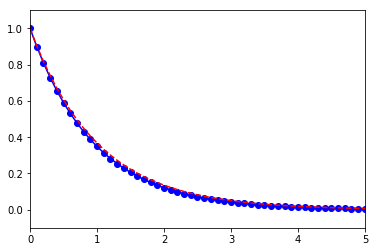

In [11]:
# -----------------------------------------
# inicialização de variáveis
# -----------------------------------------

dt = 0.1          # time step increment
nt = 500          # number of time steps
tau = 1           # half-life decay time
N0 = 1           # N(0)

Tmax = (nt-1)*dt  # this is not an input variable
                  # it only calculates the total time 
    
# -----------------------------------------
# lista para armazenar t e N(t)
# -----------------------------------------

# cria lista dos t_i com Nt elementos todos inicialmente zerados
time = np.zeros(nt)

# cria lista dos N_i com Nt elementos todos inicialmente zerados
# condição inicial da equação diferencial deve ser preenchida
decay = np.zeros(nt)
decay[0] = N0

# cria lista dos N_i com Nt elementos para a solução analítica
# todos inicialmente zerados
theory = np.zeros(nt)
theory[0] = N0

# -----------------------------------------
# loop de evolução temporal que calcula 
#       N_{i+1} = N_i(1 - dt/tau) 
# -----------------------------------------

for i in range(1,nt):
    time[i] = time[i-1] + dt
    decay[i] = decay[i-1]*(1-dt/tau)
    theory[i] = fdecay(time[i],N0,tau)
    
# -----------------------------------------
# plotagem dos resultados numérico e teórico
# -----------------------------------------

plt.plot(time, decay, '-bo',time,theory,'r--')
plt.axis([0, 5*tau, -0.1, 1.1])
plt.show()    
    

## Exemplo 2: código com vetorização

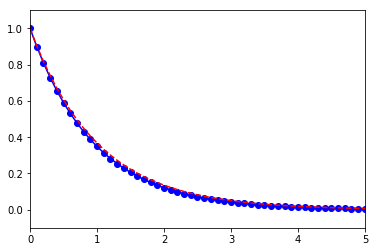

In [14]:
# -----------------------------------------
# lista para armazenar t e N(t)
# -----------------------------------------

# lista com os tempos já preenchidos
time = np.linspace(0, Tmax, nt)

# cria lista dos t_i com Nt elementos todos inicialmente zerados
# condição inicial da equação diferencial deve ser preenchida
decay = np.zeros(nt)
decay[0] = N0 

# cria lista dos N_i com Nt elementos para a solução analítica
# já preenchida
theory = fdecay(time,N0,tau)

# -----------------------------------------
# loop de evolução temporal que calcula 
#       N_{i+1} = N_i(1 - dt/tau) 
# -----------------------------------------

for i in range(1,nt): decay[i] = decay[i-1]*(1-dt/tau)
    
# -----------------------------------------
# plotagem dos resultados numérico e teórico
# -----------------------------------------
    
plt.plot(time, decay, '-bo',time,theory,'r--')
plt.axis([0, 5*tau, -0.1, 1.1])
plt.show()

## Exemplo 3: entendendo o tempo de vida $\tau$

In [16]:
time = np.linspace(0, Tmax, nt)
theory1 = fdecay(time,N0,tau)
theory2 = fdecay(time,N0,tau/2)
theory3 = fdecay(time,N0,tau/4)
theory4 = fdecay(time,N0,2*tau)

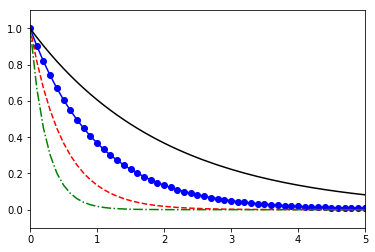

In [19]:
plt.plot(time, theory1, '-bo',time,theory2,'r--',time,theory3,'g-.',time,theory4,'k-')
plt.axis([0, 5*tau, -0.1, 1.1])
plt.show()

## Sugestões de estudo

* Escreva um código para plotar o erro $\Delta_i =  |N_{num}(t_i) - N_{teo}(t_i)|$ e determine o erro integrado $\Delta_{tot} = \sum_i \Delta_i$
* Com o código acima, plote o gráfico $\Delta_{tot}~\times~\Delta t$.
* Os exemplos acima foram escritos usando-se a derivada numérica progressiva para aproximar a derivada contínua $d N/ d t$. Escreva um código para resolver o problema do decaimento radiativo utilizando a derivada numérica central.
* Compare o erro entre as duas aproximações de derivadas numéricas com um gráfico $\Delta_{tot}~\times~\Delta t$